<a href="https://colab.research.google.com/github/ranjithdurgunala/Data-Analytics-lab/blob/main/Lab_8_Object_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Object Segmentation**

Object segmentation is the process of dividing an image into meaningful regions or objects.
Each region contains pixels that are similar in terms of color, intensity, texture, or other features.

**Goal:**

To separate objects of interest from the background or from other objects in the image.

**Example:**

In a medical image → separate tumor from healthy tissue

In a satellite image → separate land, water, buildings

In a photo → separate people, cars, background

**Hierarchical Based Methods**

Hierarchical based segmentation uses hierarchical clustering to group pixels (or regions) based on similarity.

Instead of directly dividing the image into fixed clusters, it builds a tree-like structure (dendrogram) that shows how pixels/regions are merged step by step.

**There are two main types:**

**Agglomerative (Bottom-Up) – Most commonly used**

Start with each pixel (or small region) as a separate cluster

Repeatedly merge the most similar clusters

Continue until the desired number of segments is obtained

**Divisive (Top-Down)**

Start with the whole image as one cluster

Repeatedly split it into smaller clusters

In practice, Agglomerative Hierarchical Clustering is used most for segmentation.

**How Hierarchical Segmentation Works (Step by Step)**

1. Convert the image into feature vectors

Features can be: color (R,G,B), intensity, texture, position, etc.

2. Treat each pixel (or small region) as a separate cluster

3. Compute similarity/distance between clusters

Common distances: Euclidean, Manhattan

Common linkages: single, complete, average, ward

4. Merge the two most similar clusters

5. Repeat merging until:

A fixed number of segments is reached, or

A distance threshold is reached

6. The final clusters represent segmented objects/regions in the image.

**Step 1: Import Required Libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from skimage import io
from skimage.transform import resize

**Step 2: Load the Image**

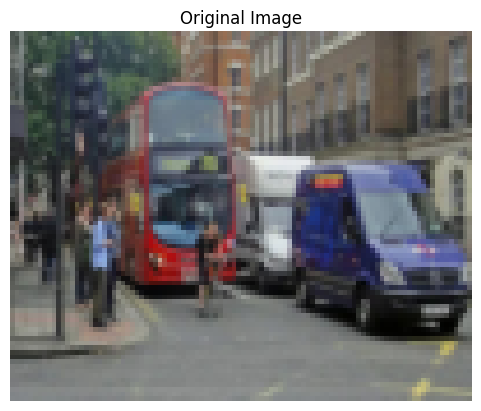

In [5]:
# Load image
image = io.imread("/content/objects.jpg")

# Resize for faster processing (optional but recommended)
image = resize(image, (80, 100), anti_aliasing=True)

plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

**Step 3: Convert Image into Feature Vectors**

Each pixel becomes a data point with features: (R, G, B)

In [6]:
# Get image shape
h, w, c = image.shape

# Reshape image to (num_pixels, 3)
X = image.reshape(-1, 3)

print("Feature matrix shape:", X.shape)

Feature matrix shape: (8000, 3)


**Step 4: Apply Hierarchical (Agglomerative) Clustering**

We choose number of segments (clusters), e.g., n_segments = 5

In [7]:
n_segments = 2  # number of regions/objects you want

model = AgglomerativeClustering(
    n_clusters=n_segments,
    linkage="ward"
)

labels = model.fit_predict(X)

print("Clustering completed!")

Clustering completed!


**Step 5: Reshape Labels Back to Image Shape**

In [8]:
# Reshape labels to image shape
segmented_labels = labels.reshape(h, w)

**Step 6: Visualize the Segmented Image**

We’ll color each segment differently.

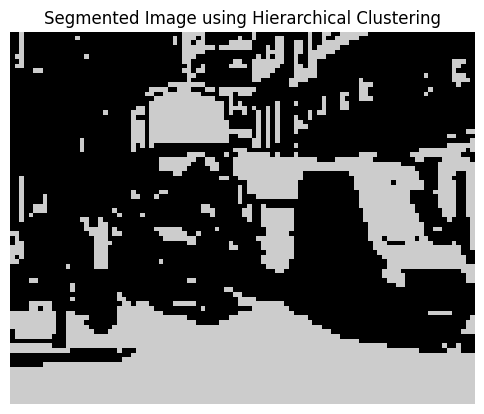

In [9]:
plt.figure(figsize=(6, 6))
plt.imshow(segmented_labels, cmap="nipy_spectral")
plt.title("Segmented Image using Hierarchical Clustering")
plt.axis("off")
plt.show()

**Step 7: (Optional) Show Each Segment Separately**

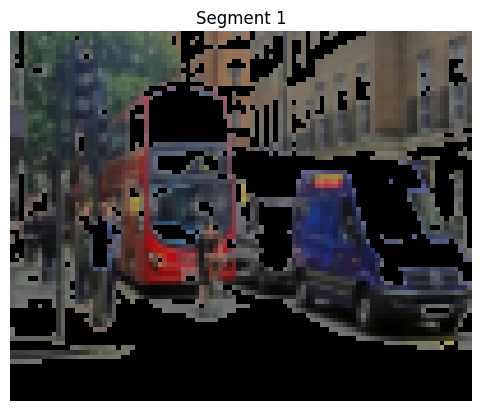

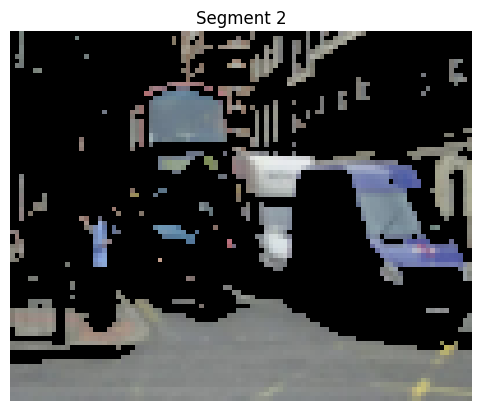

In [10]:
for i in range(n_segments):
    mask = segmented_labels == i
    segment = np.zeros_like(image)
    segment[mask] = image[mask]

    plt.figure()
    plt.imshow(segment)
    plt.title(f"Segment {i+1}")
    plt.axis("off")
    plt.show()